# Stuff

In [1]:
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pickle
import matplotlib.cm as cm

## Plotting specific trials

In [2]:
# Load epochs
epochs = mne.read_epochs("data/PreprocessedEEGData/301A_FG_preprocessed-epo.fif", preload=True)

# Check event labels
#print(epochs.event_id)

# Get event codes
t1p_code = epochs.event_id['T1P']
t1pn_code = epochs.event_id['T1Pn']

# # Find indices
t1p_idx = np.where(epochs.events[:, -1] == t1p_code)[0][0]
t1pn_idx = np.where(epochs.events[:, -1] == t1pn_code)[0][0]

Reading c:\Users\bjorn\Desktop\Spaghetti\fagprojekt\data\PreprocessedEEGData\301A_FG_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    5498.00 ms
        0 CTF compensation matrices available
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated


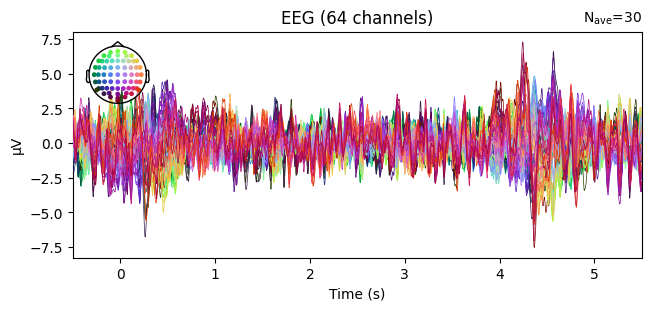

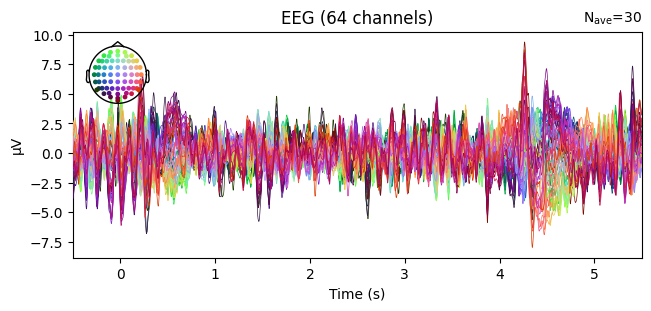

In [3]:
# Plot the average (evoked) response for T1P
epochs['T1P'].average().plot()

# Plot the average (evoked) response for T1Pn
epochs['T1Pn'].average().plot();

C:\Users\bjorn\AppData\Local\Temp\ipykernel_18912\3485670085.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('nipy_spectral', n_channels)  # Neon-like colormap


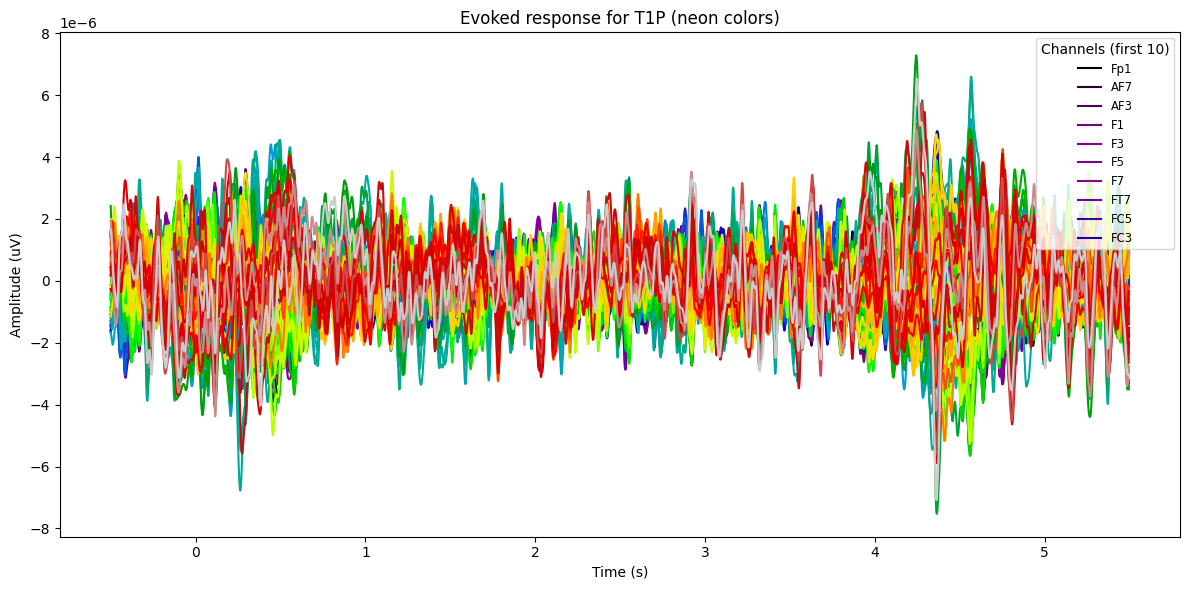

C:\Users\bjorn\AppData\Local\Temp\ipykernel_18912\3485670085.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hsv', n_channels)  # Neon-like colormap


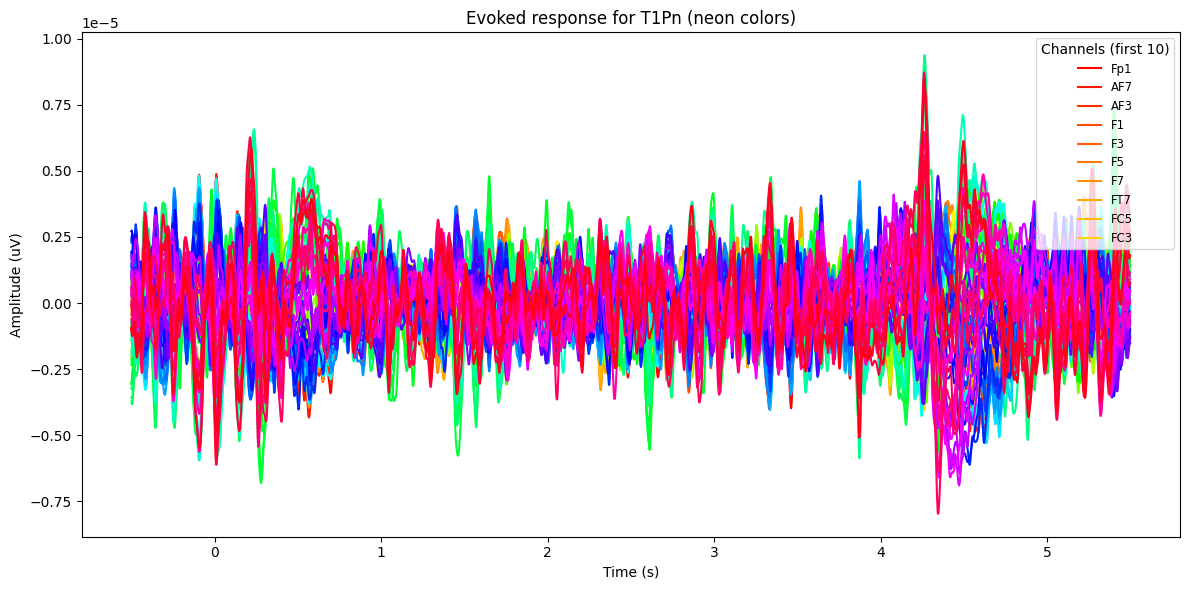

In [4]:
# For T1P
evoked_t1p = epochs['T1P'].average()
n_channels = len(evoked_t1p.ch_names)
cmap = cm.get_cmap('nipy_spectral', n_channels)  # Neon-like colormap

fig, ax = plt.subplots(figsize=(12, 6))
for ch_idx, ch_name in enumerate(evoked_t1p.ch_names):
    ax.plot(evoked_t1p.times, evoked_t1p.data[ch_idx], label=ch_name, color=cmap(ch_idx))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('Evoked response for T1P (neon colors)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:10], labels[:10], loc='upper right', fontsize='small', title="Channels (first 10)")
plt.tight_layout()
plt.show()

# For T1Pn
evoked_t1pn = epochs['T1Pn'].average()
n_channels = len(evoked_t1pn.ch_names)
cmap = cm.get_cmap('hsv', n_channels)  # Neon-like colormap

fig, ax = plt.subplots(figsize=(12, 6))
for ch_idx, ch_name in enumerate(evoked_t1pn.ch_names):
    ax.plot(evoked_t1pn.times, evoked_t1pn.data[ch_idx], label=ch_name, color=cmap(ch_idx))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('Evoked response for T1Pn (neon colors)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:10], labels[:10], loc='upper right', fontsize='small', title="Channels (first 10)")
plt.tight_layout()
plt.show()

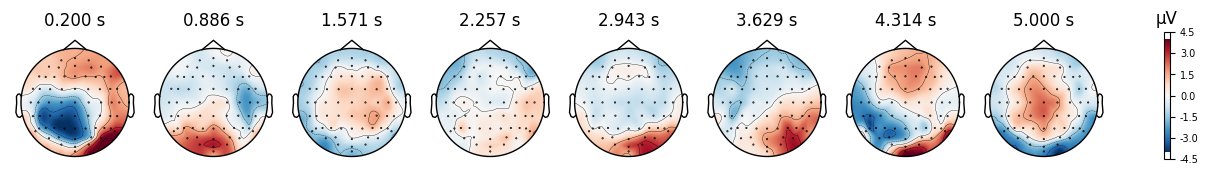

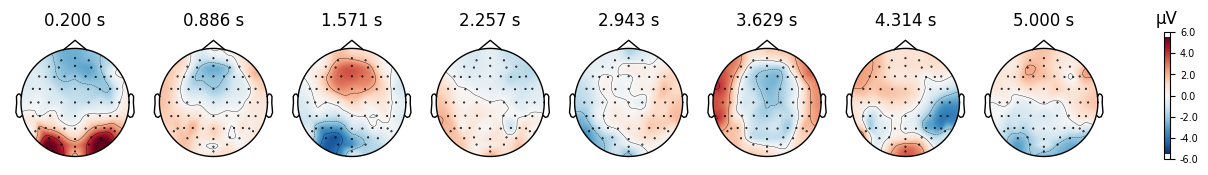

In [ ]:
# For T1P
evoked_t1p.plot_topomap(times=np.linspace(0.2, 5, 8), ch_type="eeg", show=False)

# For T1Pn
evoked_t1pn.plot_topomap(times=np.linspace(0.2, 5, 8), ch_type="eeg", show=False);

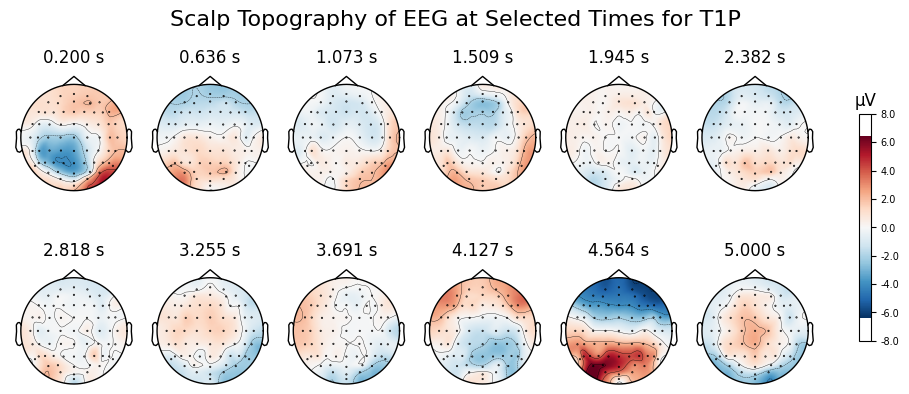

Text(0.5, 1.0, 'Multi-Channel time series of T1Pn')

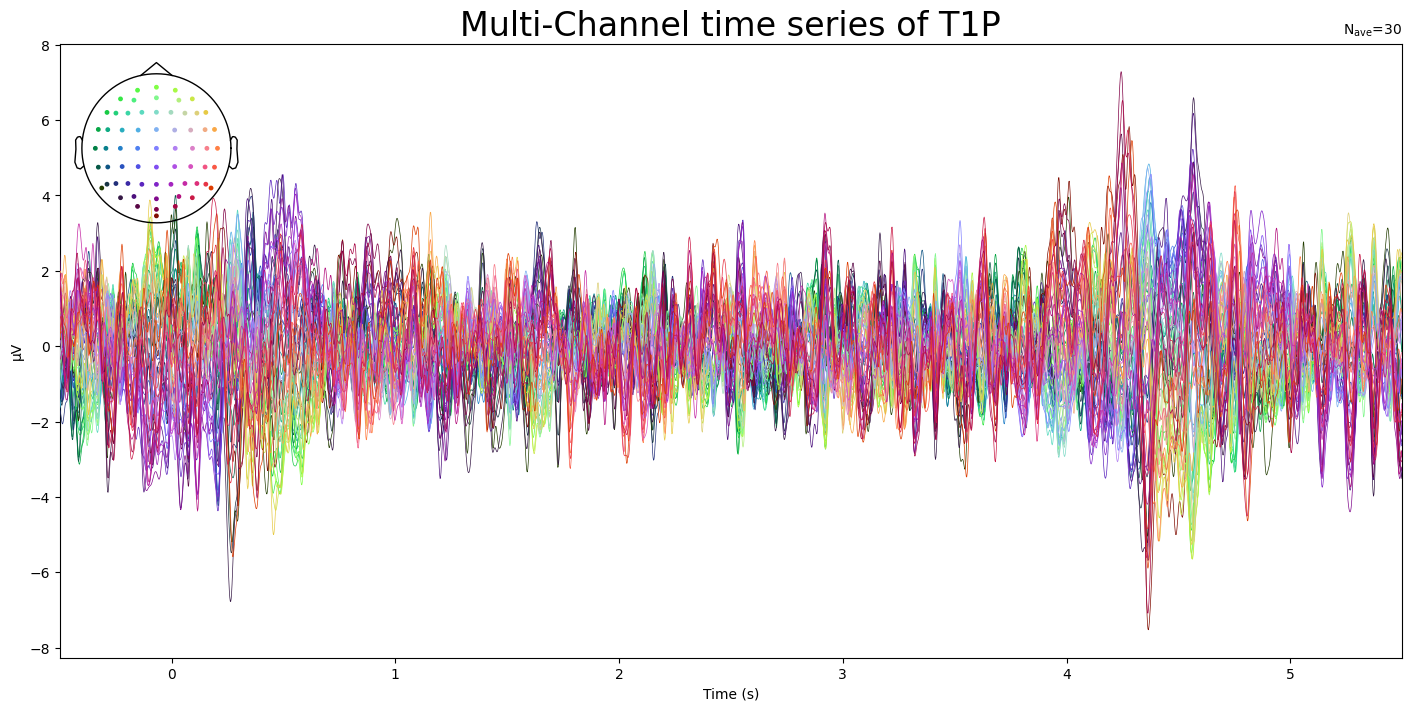

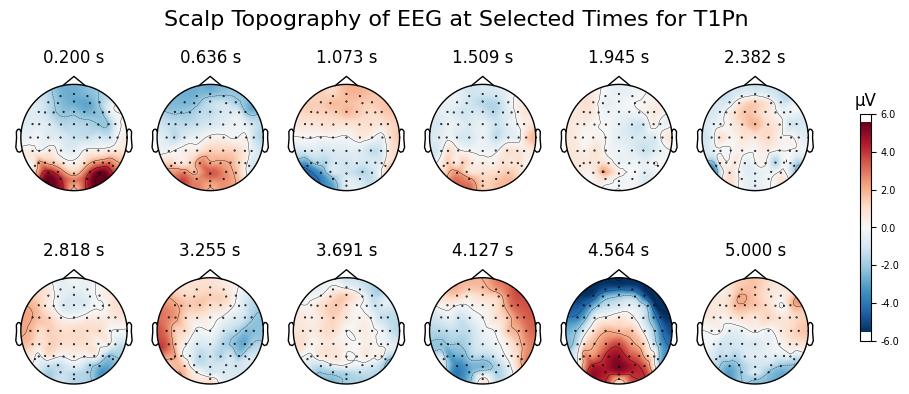

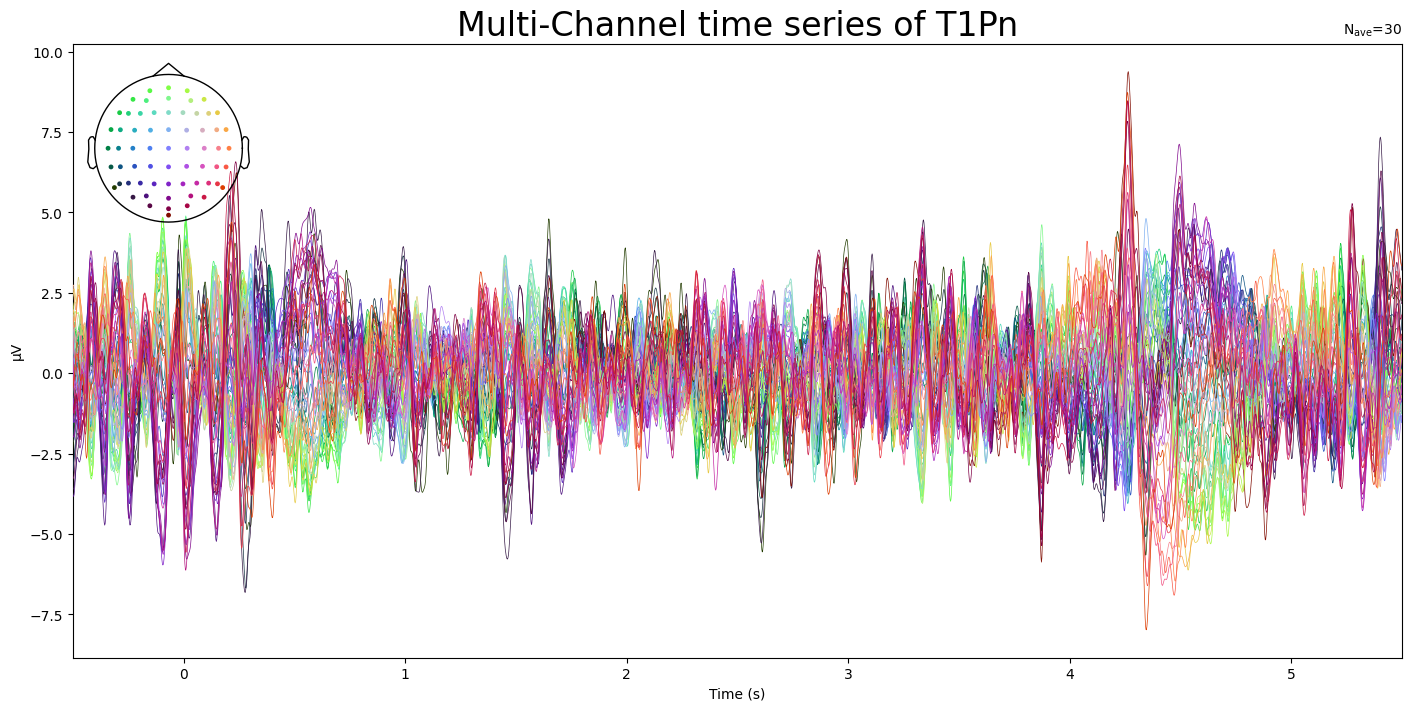

In [65]:
# Set the backend to matplotlib to ensure a Figure is returned
mne.viz.set_browser_backend('matplotlib')

# For T1P
fig = evoked_t1p.plot_topomap(times=np.linspace(0.2, 5, 12), ch_type="eeg",nrows=2, show=False)
fig.suptitle('Scalp Topography of EEG at Selected Times for T1P', fontsize=16)
plt.show()
fig.savefig("t1p_topomap.svg", format="svg")

fig = epochs['T1P'].average().plot(show=False)
fig.set_size_inches(14,7)
fig.axes[0].set_title('Multi-Channel time series of T1P', fontsize=24)
#fig.savefig("t1p_evoked.svg", format="svg")

# For T1Pn
fig = evoked_t1pn.plot_topomap(times=np.linspace(0.2, 5, 12), ch_type="eeg",nrows=2, show=False)
fig.suptitle('Scalp Topography of EEG at Selected Times for T1Pn', fontsize=16)
fig.savefig("t1pn_topomap.svg", format="svg")

fig = epochs['T1Pn'].average().plot(show=False)
fig.set_size_inches(14,7)
fig.axes[0].set_title('Multi-Channel time series of T1Pn', fontsize=24)
#fig.savefig("t1pn_evoked.svg", format="svg")

## TFR Morlet Stuff

In [17]:
from mne.time_frequency import tfr_morlet

# Select epochs for each condition
epochs_t1p = epochs['T1P']
epochs_t1pn = epochs['T1Pn']

# Define frequencies of interest (e.g., 2 to 40 Hz)
freqs = np.linspace(2, 40, 20)
n_cycles = freqs / 2.  # Common choice: cycles per frequency

# Compute TFR (power)
power_t1p = tfr_morlet(epochs_t1p, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3, n_jobs=1)
power_t1pn = tfr_morlet(epochs_t1pn, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3, n_jobs=1)

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


In [18]:
# For T1P
tfr_t1p = epochs['T1P'].compute_tfr(
    freqs=np.linspace(2, 40, 20),
    n_cycles=2,
    method="morlet",
    use_fft=True,
    return_itc=False,
    decim=3,
    n_jobs=1
)

# For T1Pn
tfr_t1pn = epochs['T1Pn'].compute_tfr(
    freqs=np.linspace(2, 40, 20),
    n_cycles=2,
    method="morlet",
    use_fft=True,
    return_itc=False,
    decim=3,
    n_jobs=1
)

Applying baseline correction (mode: logratio)


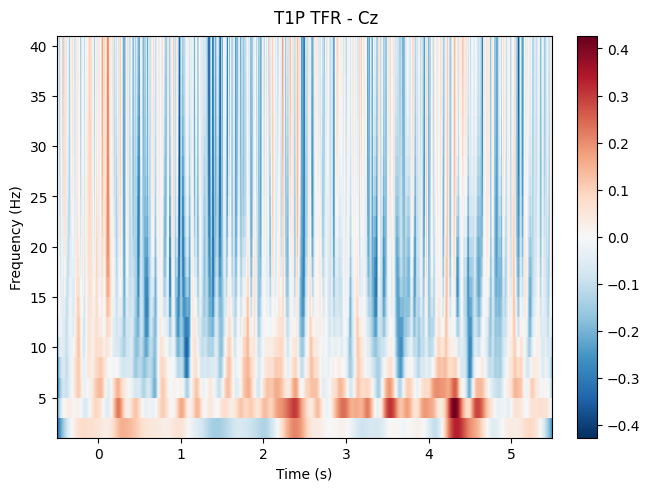

Applying baseline correction (mode: logratio)


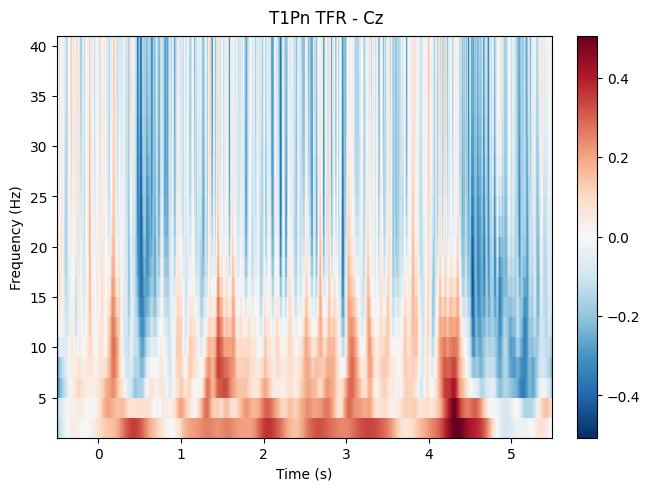

[<Figure size 640x480 with 2 Axes>]

In [20]:
# Average across epochs to get a single TFR (EvokedTFR object)
tfr_t1p_avg = tfr_t1p.average()
tfr_t1pn_avg = tfr_t1pn.average()

# Now you can plot!
tfr_t1p_avg.plot(picks='Cz', baseline=(None, 0), mode='logratio', title='T1P TFR - Cz')
tfr_t1pn_avg.plot(picks='Cz', baseline=(None, 0), mode='logratio', title='T1Pn TFR - Cz')